In [1]:
import pandas as pd
import matplotlib
import altair as alt

In [2]:
film_scripts = pd.read_csv('cleaned_pudding_data.csv')
character_list_df = pd.read_csv('character_list5.csv', encoding='ISO-8859-1')
character_mapping_df = pd.read_csv('character_mapping.csv', encoding='ISO-8859-1')
metadata_df = pd.read_csv('meta_data7.csv', encoding='ISO-8859-1')

In [3]:
film_scripts.head()

,imdb_id,script_id,title,year,gross (inflation-adjusted),link
0,tt0023622,5154,Trouble in Paradise,1932,NaN,http://www.aellea.com/emruf3/tip.html
1,tt0024368,4677,Mystery of the Wax Museum,1933,NaN,http://www.aellea.com/script/qWAX.htm
2,tt0025905,5147,Transatlantic Merry-Go-Round,1934,NaN,http://www.aellea.com/emruf3/tm.html
3,tt0031679,4658,Mr. Smith Goes to Washington,1939,NaN,http://www.dailyscript.com/scripts/Mr%20Smith%...
4,tt0031725,3016,Ninotchka,1939,45.0,http://www.dailyscript.com/scripts/Ninotchka.txt


In [4]:
character_list_df.head()

,script_id,imdb_character_name,words,gender,age
0,280,betty,311,f,35.0
1,280,carolyn johnson,873,f,NaN
2,280,eleanor,138,f,NaN
3,280,francesca johns,2251,f,46.0
4,280,madge,190,f,46.0


In [5]:
character_mapping_df.head()

,script_id,imdb_id,character_from_script,closest_character_name_from_imdb_match,closest_imdb_character_id
0,1,tt0147800,bianca,bianca stratford,nm0646351
1,1,tt0147800,cameron,cameron james,nm0330687
2,1,tt0147800,chastity,chastity,nm0005517
3,1,tt0147800,joey,joey donner,nm0005080
4,1,tt0147800,kat,kat stratford,nm0005466


In [6]:
metadata_df.head()

,script_id,imdb_id,title,year,gross,lines_data
0,1534,tt1022603,(500) Days of Summer,2009,37.0,7435445256774774443342577775657744434444564456...
1,1512,tt0147800,10 Things I Hate About You,1999,65.0,1777752320274533344457777722433777334443764677...
2,1514,tt0417385,12 and Holding,2005,NaN,5461357777754212454544441367774433446547647753...
3,1517,tt2024544,12 Years a Slave,2013,60.0,4567334777777777777777447777756477777444777777...
4,1520,tt1542344,127 Hours,2010,20.0,453513352345765766777777773340


In [7]:
dialogue_df = pd.merge(character_list_df, metadata_df, on='script_id', how="inner")
dialogue_df.head()

,script_id,imdb_character_name,words,gender,age,imdb_id,title,year,gross,lines_data
0,280,betty,311,f,35.0,tt0112579,The Bridges of Madison County,1995,142.0,4332023434343443203433434334433434343434434344...
1,280,carolyn johnson,873,f,NaN,tt0112579,The Bridges of Madison County,1995,142.0,4332023434343443203433434334433434343434434344...
2,280,eleanor,138,f,NaN,tt0112579,The Bridges of Madison County,1995,142.0,4332023434343443203433434334433434343434434344...
3,280,francesca johns,2251,f,46.0,tt0112579,The Bridges of Madison County,1995,142.0,4332023434343443203433434334433434343434434344...
4,280,madge,190,f,46.0,tt0112579,The Bridges of Madison County,1995,142.0,4332023434343443203433434334433434343434434344...


### How could we tell if the amount of dialogue was increasing over time in movies? How might this influence the assessment about the breakdown of gender dialogue?

<Axes: xlabel='year'>

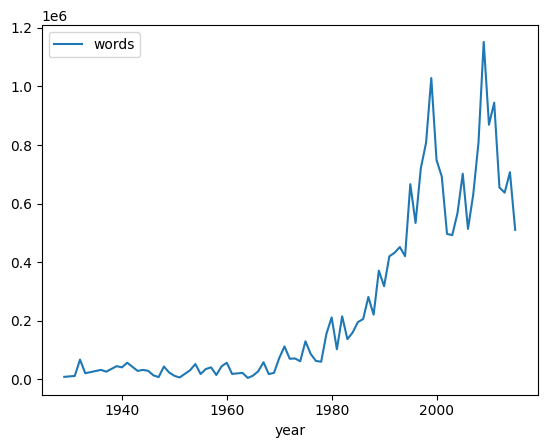

In [12]:
alt.data_transformers.enable("vegafusion")

grouped_dialogue_df = dialogue_df.groupby('year')['words'].sum().reset_index()
grouped_dialogue_df.plot(kind='line',x='year',y='words')

In [13]:
grouped_dialogue_df2 = dialogue_df.groupby(['year', 'gender'])['words'].sum().reset_index()
grouped_dialogue_df2['date'] = grouped_dialogue_df2['year'].astype(str) + '-01-01'
grouped_dialogue_df2['date'] = pd.to_datetime(grouped_dialogue_df2['date'])
alt.Chart(grouped_dialogue_df2).mark_line().encode(
    x='date:T',
    y='words',
    color='gender'
)

alt.Chart(...)

### How could test if there was any relationship between the film’s gross value and the amount of dialogue in the film?

In [15]:
grouped_dialogue_df3 = dialogue_df.groupby(['words', 'gender'])['gross'].sum().reset_index()
alt.Chart(grouped_dialogue_df3).mark_point().encode(
    x='words',
    y='gross',
)

alt.Chart(...)